# Simulation of AR(2) process
x_t=phi1*x_(t-1)+phi2*x_(t-2)+z_t
z_t~ N(0, sigma^2)

## set seed a common number, so we can reproduce the same datasets

In [1]:
set.seed(2017)

## model parameters (we will estimate them)


In [2]:
sigma=4
phi=NULL
phi[1:2]=c(1/3,1/2)
phi

[1] 0.3333333 0.5000000

## number of data points


In [3]:
n=10000

## simulate ar process

In [4]:
ar.process=arima.sim(n,model=list(ar=phi), sd=sigma)
ar.process[1:5]

[1] 4.087685 5.598492 3.019295 2.442354 5.398302

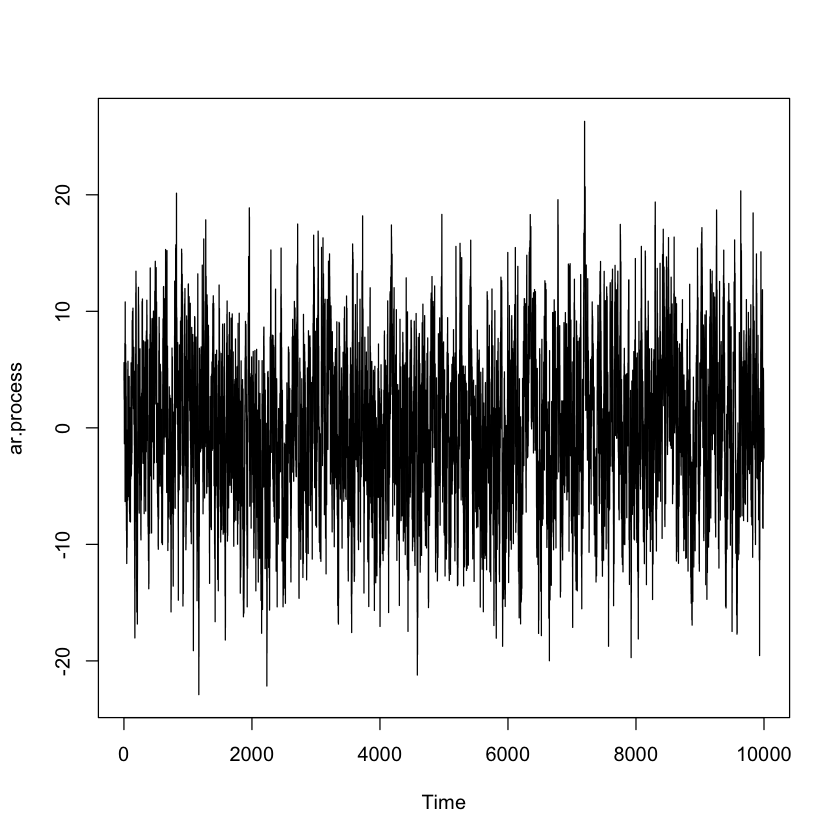

In [5]:
plot(ar.process)

## find and name 2nd and 3rd sample autocorrelation

In [6]:
r=NULL
r[1:2]=acf(ar.process, plot=F)$acf[2:3]
r

[1] 0.6814103 0.7255825

## matrix R

In [7]:
R=matrix(1,2,2) # matrix of dimension 2 by 2, with entries all 1's.
R

1,1
1,1


## edit R

In [8]:
R[1,2]=r[1] # only diagonal entries are edited
R[2,1]=r[1] # only diagonal entries are edited
R

1.0000000,0.6814103
0.6814103,1.0000000


## b-column vector on the right

In [9]:
b=matrix(r,nrow=2,ncol=1)# b- column vector with no entries
b

0.6814103
0.7255825


## solve(R,b) solves Rx=b, and gives x=R^(-1)b vector

In [10]:
phi.hat=matrix(c(solve(R,b)[1,1], solve(R,b)[2,1]),2,1)
phi.hat

0.3490720
0.4877212


## variance estimation

In [11]:
c0=acf(ar.process, type='covariance', plot=F)$acf[1]
var.hat=c0*(1-sum(phi.hat*r))
var.hat

[1] 16.37169

## plot time series, along with acf, pacf


Autocovariances of series ‘ar.process’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
40.101 27.326 29.097 23.407 22.391 19.212 17.581 15.326 13.880 12.244 11.062 
    11     12     13     14     15     16     17     18     19     20     21 
 9.854  8.728  7.489  6.876  5.659  5.124  4.499  3.482  3.325  2.722  2.351 
    22     23     24     25     26     27     28     29     30     31     32 
 2.021  1.563  1.477  1.160  1.258  1.132  1.137  1.045  1.033  0.811  0.759 
    33     34     35     36     37     38     39     40 
 0.626  0.624  0.726  0.617  0.724  0.395  0.481  0.297 


Autocorrelations of series ‘ar.process’, by lag

    0     1     2     3     4     5     6     7     8     9    10    11    12 
1.000 0.681 0.726 0.584 0.558 0.479 0.438 0.382 0.346 0.305 0.276 0.246 0.218 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
0.187 0.171 0.141 0.128 0.112 0.087 0.083 0.068 0.059 0.050 0.039 0.037 0.029 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
0.031 0.028 0.028 0.026 0.026 0.020 0.019 0.016 0.016 0.018 0.015 0.018 0.010 
   39    40 
0.012 0.007 


Partial autocorrelations of series ‘ar.process’, by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.681  0.488 -0.005  0.003  0.000 -0.003 -0.009  0.003  0.002  0.004  0.003 
    12     13     14     15     16     17     18     19     20     21     22 
-0.007 -0.021  0.011 -0.013 -0.004  0.014 -0.029  0.009  0.011 -0.008  0.001 
    23     24     25     26     27     28     29     30     31     32     33 
-0.008  0.007  0.002  0.012  0.009  0.000  0.000  0.001 -0.010 -0.002  0.000 
    34     35     36     37     38     39     40 
 0.004  0.014 -0.003  0.002 -0.015 -0.002  0.001 

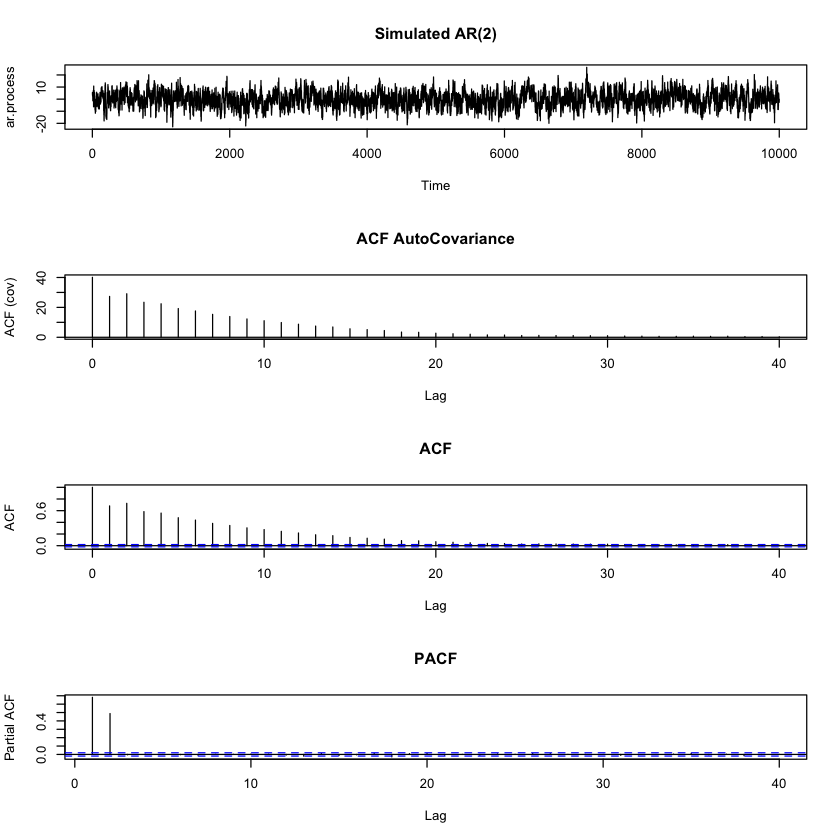

In [13]:
par(mfrow=c(4,1))
plot(ar.process, main='Simulated AR(2)')
(acf(ar.process, main='ACF AutoCovariance', type='covariance'))
(acf(ar.process, main='ACF'))
(pacf(ar.process, main='PACF'))